# Part 5 Playing With Sets and Probality

In [2]:
# Applying a Formula to multiple sets of variables

from sympy import FiniteSet, pi

def time_period(lenght):
    g = 9.8
    T = 2*pi*(lenght/g)**0.5
    return T

if __name__ == '__main__':
    L = FiniteSet(15,18,21,22.5,25)
    for l in L:
        t = time_period(l/100)
        print('Lenght: {0} cm Time Period: {1:.3f} s'.format(float(l), float(t)))

Lenght: 15.0 cm Time Period: 0.777 s
Lenght: 18.0 cm Time Period: 0.852 s
Lenght: 21.0 cm Time Period: 0.920 s
Lenght: 22.5 cm Time Period: 0.952 s
Lenght: 25.0 cm Time Period: 1.004 s


In [3]:
# Different Gravity, Different Results

from sympy import FiniteSet, pi

def time_period(lenght, g):
    
    T = 2*pi*(lenght/g)**0.5
    return T

if __name__ == '__main__':
    
    L = FiniteSet(15,18,21,22.5,25)
    g_values = FiniteSet(9.8,9.78,9.83)
    print('{0:^15}{1:^15}{2:^15}'.format('Length(cm)', 'Gravity(m/s^2)', 'Time Period(s)'))
    for elem in L*g_values:
        l = elem[0]
        g = elem[1]
        t = time_period(l/100, g)
        
        print('{0:^15}{1:^15}{2:^15.3f}'.format(float(l), float(g), float(t)))
        
        

  Length(cm)   Gravity(m/s^2) Time Period(s) 
     15.0           9.78           0.778     
     18.0           9.78           0.852     
     15.0            9.8           0.777     
     21.0           9.78           0.921     
     18.0            9.8           0.852     
     15.0           9.83           0.776     
     22.5           9.78           0.953     
     21.0            9.8           0.920     
     18.0           9.83           0.850     
     25.0           9.78           1.005     
     22.5            9.8           0.952     
     21.0           9.83           0.918     
     25.0            9.8           1.004     
     22.5           9.83           0.951     
     25.0           9.83           1.002     


In [5]:
# Probability

def probability(space, event):
    return len(event)/len(space)

def check_prime(number):
    if number !=1:
        for factor in range(2, number):
            if number % factor == 0:
                return False
    else:
        return False
    return True

if __name__ == '__main__':
    space = FiniteSet(*range(1, 21))
    primes = []
    for num in s:
        if check_prime(num):
            primes.append(num)
    event = FiniteSet(*primes)
    p = probability(space, event)
    
    print('Sample space: {0}'.format(space))
    print('Event: {0}'.format(event))
    print('Probability of rolling a prime: {0:.5f}'.format(p))

NameError: name 's' is not defined

In [16]:
'''
Roll a die until the total score 20
'''

import matplotlib.pyplot as plt
import random

target_score = 20
def roll():
    return random.randint(1, 6)

if __name__ == '__main__':
    score = 0
    num_rolls = 0
    while score < target_score:
        die_roll = roll()
        num_rolls += 1
        print('Rolled: {0}'.format(die_roll))
        score += die_roll
    print(f'Score of {0} reached in {1}',(score, num_rolls))

Rolled: 2
Rolled: 1
Rolled: 5
Rolled: 6
Rolled: 5
Rolled: 1
Score of 0 reached in 1 (20, 6)


In [14]:
# Is the Target Score Possible?

from sympy import FiniteSet
import random

def find_prob(targe_score, max_rolls):
    
    die_sides = FiniteSet(1,2,3,4,5,6)
    # Sample space
    s = die_sides**max_rolls#1
    # Find the event set
    if max_rolls > 1:
        success_rolls = []
        for elem in s:#2
            if sum(elem) >= target_score:
                success_rolls.append(elem)
    else:
        if target_score > 6:
            success_rolls = []#3
        else:
            success_rolls = []
            for roll in die_sides:
                if roll >= target_score:#4
                    success_rolls.append(roll)
    e = FiniteSet(*success_rolls)#5
    # Caculate the probability of reaching target score
    return len(e)/len(s)

if __name__ == "__main__":
    
    target_score = int(input('Enter the target score: '))
    max_rolls = int(input('Enter the maximum number of rolls allowed: '))
    p = find_prob(target_score, max_rolls)
    print(f'Probability: {0:.5f}',(p))
    
            

Enter the target score: 3
Enter the maximum number of rolls allowed: 5
Probability: 0.00000 1.0


In [12]:
'''
Simulate a fictional ATM that dispenses dollar 
bills of various denominations with varying probability
'''

import random

def get_index(probability):
    c_probability = 0
    sum_probability = []#1
    for p in probability:
        c_probability += p
        sum_probability.append(c_probability)
    r = random.random()#2
    for index, sp in enumerate(sum_probability):
        if r <= sp:#3
            return index
    return len(probability)-1#4

def dispense():
    
    dollar_bills = [5,10,20,50]
    probability = [1/6,1/6,1/3,2/3]
    bill_index = get_index(probability)
    return dollar_bills[bill_index]


# Progamming Challenges

## 1: Using Venn Diagrams to Visualize Relationships Between Sets

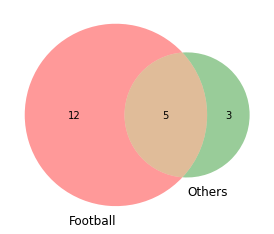

A venn diagram showing the numbers of students who love to play football and the number who love play other sports


In [4]:
'''
Venn_sports
Is football the favorite sportt in my class too?
Let's find using a venn diagram
'''

from sympy import FiniteSet
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import csv

def read_csv(filename):
    
    football = []
    others  = []
    
    with open(filename) as f:
        reader = csv.reader(f)
        next(reader)
        for row in reader:
            if row[1] == '1':
                football.append(row[0])
            if row[2] == '1':
                others.append(row[0])
    return football, others

def draw_venn(f, o):
    venn2(subsets=(f, o), set_labels=('Football', 'Others'))
    plt.show()
    
if __name__ == '__main__':
    football, others = read_csv('sports.csv')
    f = FiniteSet(*football)
    o = FiniteSet(*others)
    draw_venn(f, o)
    print('A venn diagram showing the numbers of students who love to play football and the number who love play other sports')

## 2: Law of Large Numbers

In [16]:
'''
Verify the law of large numbers using a six_sided die as an example
'''

import random

def roll(num_trials):
    rolls = []
    for t in range(num_trials):
        rolls.append(random.randint(1,6))
    return sum(rolls)/num_trials

if __name__ == '__main__':
    expected_value = 3.5
    print(f'Expected value: {expected_value}')
    for trial in [100,1000,10000,100000,500000]:
        avg = roll(trial)
        print(f'Trials: {trial} Trial average {avg}')

Expected value: 3.5
Trials: 100 Trial average 3.44
Trials: 1000 Trial average 3.512
Trials: 10000 Trial average 3.4904
Trials: 100000 Trial average 3.4963
Trials: 500000 Trial average 3.501296


## 3: How Many Tosses Before You Run Out of Money?

In [21]:
'''
Game_Tosses

A player wins 1$ for every head and loses 1.5$ for every tail.
The game is over when the player's balance reaches 0$
'''

import random

def play(start_amount):
    win_amount = 1
    loss_amount = 1.5
    
    cur_amount = start_amount
    tosses = 0
    
    while cur_amount > 0:
        tosses += 1
        toss = random.randint(0,1)
        if toss == 0:
            cur_amount += win_amount
            print(f'Heads! Current amount: {cur_amount}')
        else:
            cur_amount -= loss_amount
            print(f'Tails! Current amount: {cur_amount}')
    print(f'Game Over :( Current amount: {cur_amount} Coin tosses: {tosses})')
    
if __name__ == '__main__':
    start_amount = float(input('Enter your starting amount: '))
    play(start_amount)

Enter your starting amount: 2
Heads! Current amount: 3.0
Tails! Current amount: 1.5
Heads! Current amount: 2.5
Heads! Current amount: 3.5
Tails! Current amount: 2.0
Tails! Current amount: 0.5
Heads! Current amount: 1.5
Tails! Current amount: 0.0
Game Over :( Current amount: 0.0 Coin tosses: 8)


## 4: Shuffing a Deck of Cards


In [51]:
'''
shuffel enhanced
Shuffel a deck of 52 card
'''
import random

class Card:
    
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank
    
def initialize_deck():
    suits = ['Clubs', 'Diamonds', 'Hearts', 'Spades']
    ranks = ['Ace', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'Jack', 'Queen', 'King']
    cards = []
    for suit in suits:
        for rank in ranks:
            card = Card(suit, rank)
            cards.append(card)
    return cards
    
def shuffel_and_print(cards):
    random.shuffle(cards)
    for card in cards:
        print(f'{card.rank} of {card.suit}')
    
if __name__ == '__main__':
    cards = initialize_deck()
    shuffel_and_print(cards)
        
                

7 of Spades
10 of Spades
4 of Hearts
Jack of Diamonds
3 of Hearts
King of Clubs
5 of Diamonds
4 of Spades
5 of Spades
3 of Clubs
King of Hearts
10 of Hearts
8 of Hearts
Ace of Spades
2 of Hearts
8 of Spades
10 of Diamonds
3 of Diamonds
7 of Hearts
Jack of Spades
King of Diamonds
6 of Hearts
Ace of Diamonds
8 of Diamonds
Ace of Hearts
2 of Spades
8 of Clubs
9 of Spades
9 of Hearts
4 of Diamonds
6 of Diamonds
Queen of Clubs
6 of Clubs
6 of Spades
Queen of Spades
10 of Clubs
5 of Clubs
2 of Diamonds
King of Spades
7 of Clubs
3 of Spades
5 of Hearts
Jack of Clubs
Queen of Diamonds
Ace of Clubs
9 of Diamonds
9 of Clubs
2 of Clubs
Jack of Hearts
Queen of Hearts
7 of Diamonds
4 of Clubs


## 5: Estimating the Area of a Circle

In [56]:
'''
Estimate the area of a circle
'''
import math
import random

def estimate(radius, total_points):
    center = (radius, radius)
    
    in_circle = 0
    for i in range(total_points):
        x = random.uniform(0, 2*radius)
        y = random.uniform(0, 2*radius)
        p = (x, y)
        # distance of the point created from circle's center
        d = math.sqrt((p[0]-center[0])**2 + (p[1]-center[1])**2)
        if d <= radius:
            in_circle += 1
    area_of_square = (2*radius)**2
    return (in_circle/total_points)*area_of_square

if __name__ == '__main__':
    radius = float(input('Radius: '))
    area_of_circle = math.pi*radius**2
    for points in [10**3, 10**5, 10**6]:
        print(f'Area: {area_of_circle} Estimated ({points}): {estimate(radius, points)} ')
        


Radius: 2
Area: 12.566370614359172 Estimated (1000): 12.72 
Area: 12.566370614359172 Estimated (100000): 12.53904 
Area: 12.566370614359172 Estimated (1000000): 12.566032 


In [55]:
'''
Estimate the value of pi
'''
import math
import random

def estimate(total_points):
    radius = 1
    center = (radius, radius)
    
    in_circle = 0
    for i in range(total_points):
        x = random.uniform(0, 2*radius)
        y = random.uniform(0, 2*radius)
        p = (x, y)
        # distance of the point created from circle's center
        d = math.sqrt((p[0]-center[0])**2 + (p[1]-center[1])**2)
        if d <= radius:
            in_circle += 1
    return (in_circle/total_points)*4

if __name__ == '__main__':
    for points in [10**3, 10**5, 10**6]:
        print(f'Known value: {math.pi} Estimated ({points}): {estimate(points)} ')
        

Known value: 3.141592653589793 Estimated (1000): 3.16 
Known value: 3.141592653589793 Estimated (100000): 3.1478 
Known value: 3.141592653589793 Estimated (1000000): 3.142008 
